In [4]:
import math
import pandas as pd
import numpy as np
import plotly
import hvplot.pandas


pd.options.plotting.backend = "plotly"

from cadCAD.configuration.utils import config_sim

from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor

from cadCAD.configuration import Experiment
from cadCAD import configs

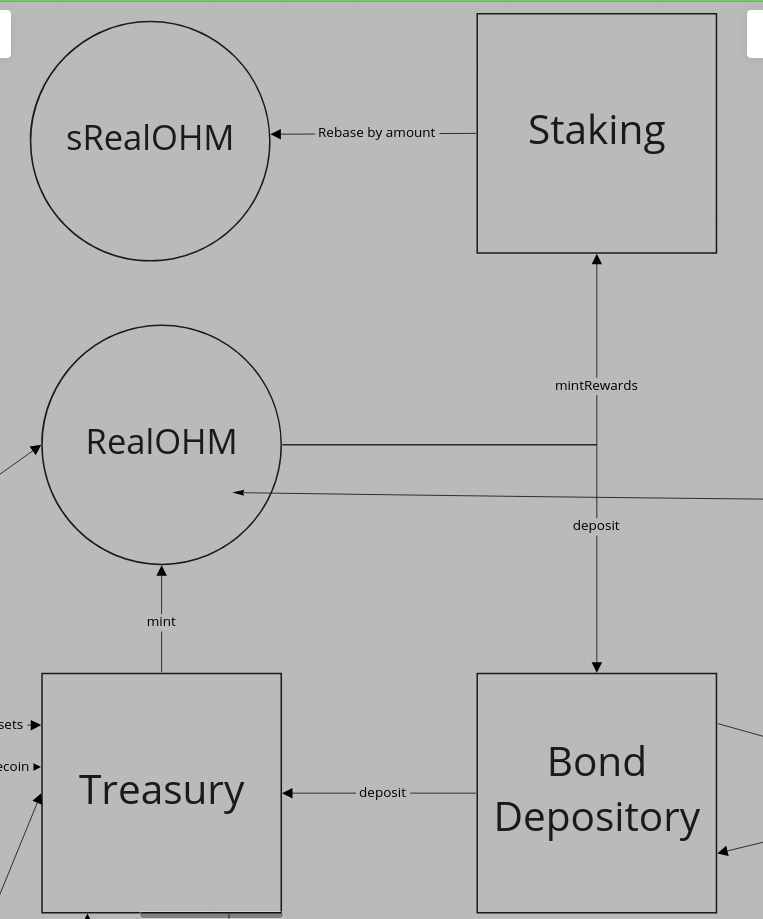

In [1]:
SIMULATION_TIMESTEPS = 365

initial_state = {
    'sreal_ohm': 0,
    'staking': 0,
    'real_ohm': 1000000,
    'treasury': 1,
    'bond_depository': 0,
}

system_params = {
    'stake_rate': [0.1],
    'reward_rate_target': [0.0035] # Drip-feed rewards to stakers as a percent of total supply. The reward rate determines the rebase rate and that the rebase rate determines the APY. https://docs.olympusdao.finance/main/contracts/staking#distributor
}

In [2]:
def p_stake_realohm(params, substep, state_history, previous_state):
    real_ohm = previous_state['real_ohm']
    stake_rate = params['stake_rate']
    delta_staked = real_ohm * stake_rate
    delta_real_ohm = -delta_staked
    return {'delta_staked': delta_staked, 'delta_real_ohm': delta_real_ohm}

def p_bond_realohm(params, substep, state_history, previous_state):
    I = previous_state['infected']
    b  = params['recovery_rate']
    delta_I = -b*I
    delta_R = -delta_I
    return {'delta_I': delta_I, 'delta_R':delta_R}